In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as wr
wr.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"E:\Downloads\Copper_Set.xlsx - Result 1.csv")
df.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00


In [3]:
df.shape

(181673, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181672 non-null  float64
 2   quantity tons  181673 non-null  object 
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181672 non-null  float64
 13  selling_price  181672 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 19.4+ MB


In [5]:
df.describe()

,item_date,customer,country,application,thickness,width,product_ref,delivery date,selling_price
count,1.816720e+05,1.816720e+05,181645.000000,181649.000000,181672.000000,181673.000000,1.816730e+05,1.816720e+05,1.816720e+05
mean,2.020459e+07,3.051221e+07,44.893022,25.615809,2.564827,1295.286724,4.739679e+08,2.020738e+07,1.918036e+03
std,4.551119e+03,2.433382e+07,24.404214,17.754175,6.572321,261.631754,7.175101e+08,2.411059e+04,3.317956e+05
min,1.995000e+07,1.245800e+04,25.000000,2.000000,0.180000,1.000000,6.117280e+05,2.019040e+07,-1.160000e+03
25%,2.020093e+07,3.019688e+07,26.000000,10.000000,0.700000,1180.000000,6.119930e+05,2.020110e+07,6.690000e+02
50%,2.020113e+07,3.020524e+07,30.000000,15.000000,1.500000,1250.000000,6.406650e+05,2.021010e+07,8.120000e+02
75%,2.021020e+07,3.028042e+07,78.000000,41.000000,3.000000,1500.000000,1.332077e+09,2.021040e+07,9.530000e+02
max,2.021040e+07,2.147484e+09,113.000000,99.000000,2500.000000,2990.000000,1.722208e+09,3.031010e+07,1.000010e+08


In [6]:
columns = df.columns.tolist()

In [7]:
df.isnull().sum()

id                   2
item_date            1
quantity tons        0
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        1
selling_price        1
dtype: int64

In [8]:
df.nunique()

id               181671
item_date           252
quantity tons    181673
customer           1169
country              17
status                9
item type             7
application          30
thickness           594
width              1386
material_ref      16563
product_ref          33
delivery date        28
selling_price      9795
dtype: int64

In [9]:

df['id'] = df['id'].astype('string') 
df['item_date'] = pd.to_datetime(df['item_date'], unit='s', errors='coerce').dt.date 
df['quantity tons'] = pd.to_numeric(df['quantity tons'], errors='coerce') 
df['customer'] = df['customer'].astype('int64', errors='ignore')
df['country'] = df['country'].astype('category')
df['status'] = df['status'].astype('string')
df['item type'] = df['item type'].astype('category')
df['application'] = pd.to_numeric(df['application'], errors='coerce') 
df['thickness'] = pd.to_numeric(df['thickness'], errors='coerce') 
df['width'] = pd.to_numeric(df['width'], errors='coerce')  
df['material_ref'] = df['material_ref'].astype('string') 
df['product_ref'] = df['product_ref'].astype('int64')  
df['delivery date'] = pd.to_datetime(df['delivery date'], unit='s', errors='coerce').dt.date
df['selling_price'] = pd.to_numeric(df['selling_price'], errors='coerce')  


In [10]:
df.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,1970-08-22,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,1970-08-22,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,1970-08-22,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,1970-08-22,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,1970-08-22,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,1970-08-22,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,1970-08-22,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,1970-08-22,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,1970-08-22,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,1970-08-22,577.00


In [11]:
df['id'] = df['id'].fillna('not available') 
df['item_date'].fillna(method='ffill', inplace=True) 
df['quantity tons'].fillna(df['quantity tons'].median(), inplace=True) 
df['customer'].fillna(df['customer'].mode().iloc[0], inplace=True)
df['country'].fillna(df['country'].mode().iloc[0], inplace=True)
df['status'].fillna('Not Provided', inplace=True)
df['item type'].fillna(df['item type'].mode().iloc[0], inplace=True)
df['application'].fillna('Not Specified', inplace=True)
df['thickness'].fillna(df['thickness'].median(), inplace=True)
df['width'].fillna(df['width'].median(), inplace=True)
df['material_ref'].fillna(df['material_ref'].mode().iloc[0], inplace=True)
df['product_ref'].fillna(df['product_ref'].mode().iloc[0], inplace=True)
df['delivery date'].fillna(method='ffill', inplace=True)
df['selling_price'].fillna(df['selling_price'].median(), inplace=True)


In [12]:
df.isnull().sum()

id               0
item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
material_ref     0
product_ref      0
delivery date    0
selling_price    0
dtype: int64

In [13]:
df.dtypes

id               string[python]
item_date                object
quantity tons           float64
customer                float64
country                category
status           string[python]
item type              category
application              object
thickness               float64
width                   float64
material_ref     string[python]
product_ref               int64
delivery date            object
selling_price           float64
dtype: object

In [14]:
from scipy.stats import skew

Processing column: quantity tons
Skewness: 424.69081645105615
Using 10000 random samples from 181673 rows.


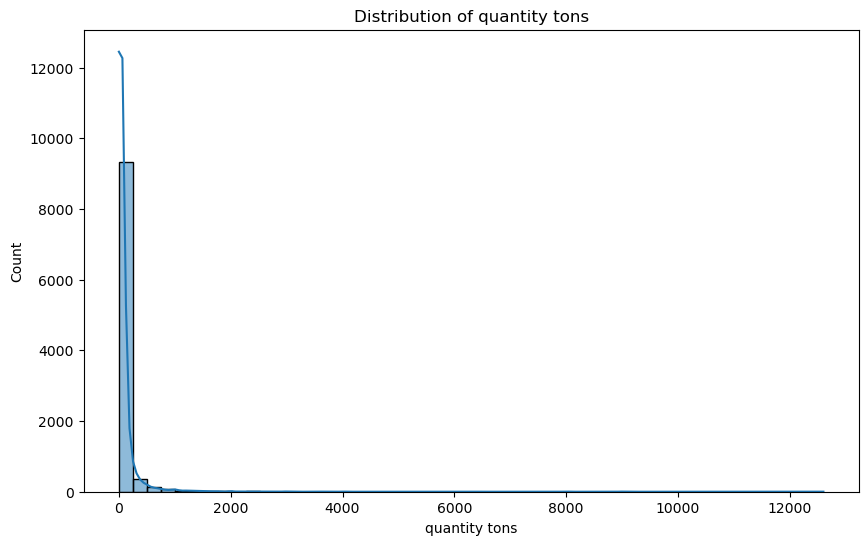

Processing column: customer
Skewness: 86.9853083481409
Using 10000 random samples from 181673 rows.


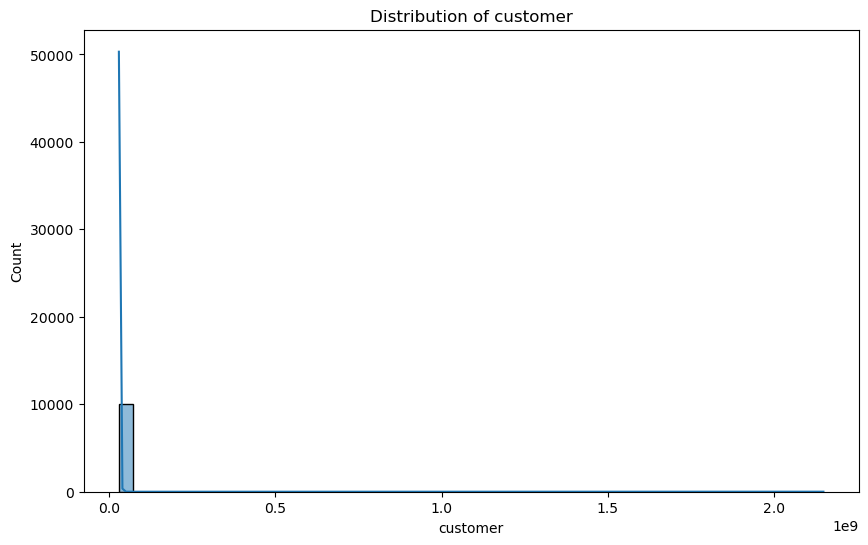

Processing column: thickness
Skewness: 303.4475711614558
Using 10000 random samples from 181673 rows.


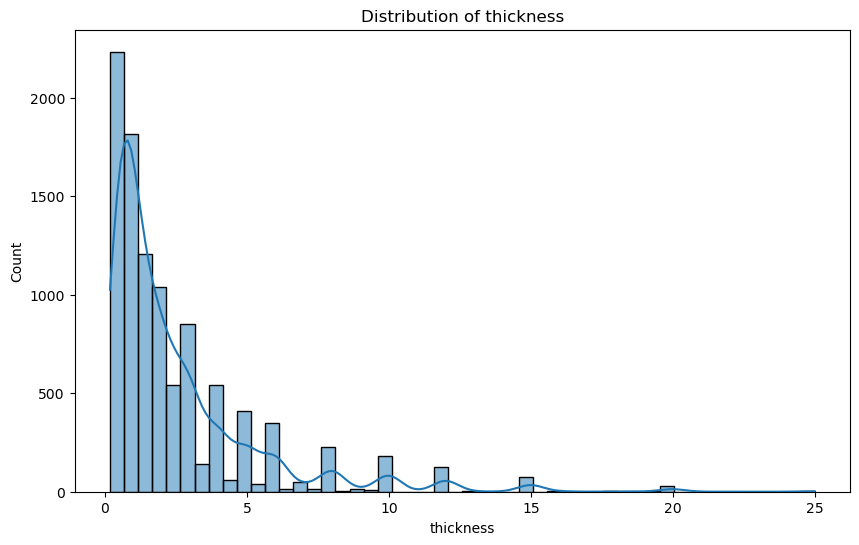

Processing column: width
Skewness: 0.3745967719109581
Using 10000 random samples from 181673 rows.


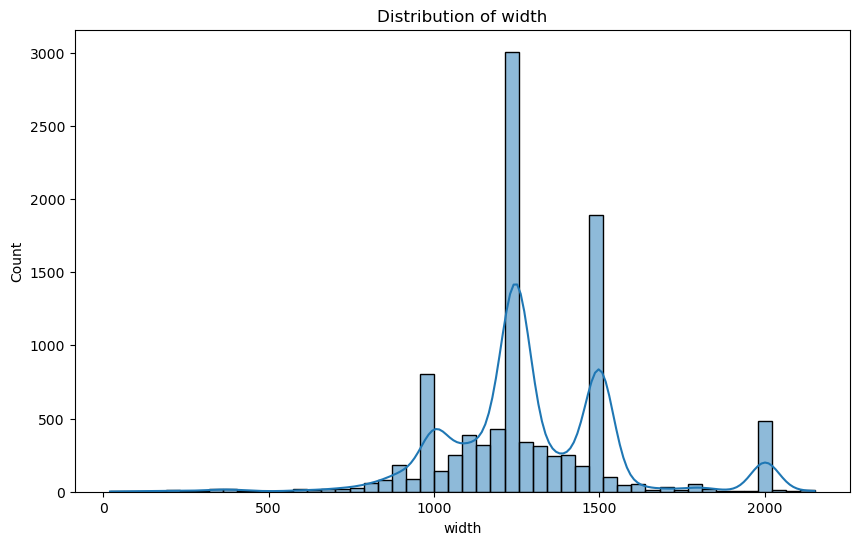

Processing column: product_ref
Skewness: 1.0152155732872308
Using 10000 random samples from 181673 rows.


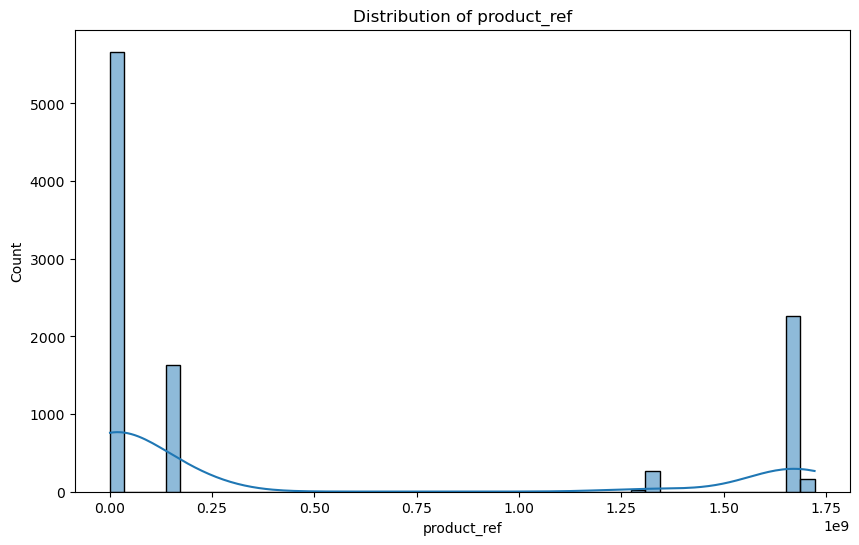

Processing column: selling_price
Skewness: 301.3880879059445
Using 10000 random samples from 181673 rows.


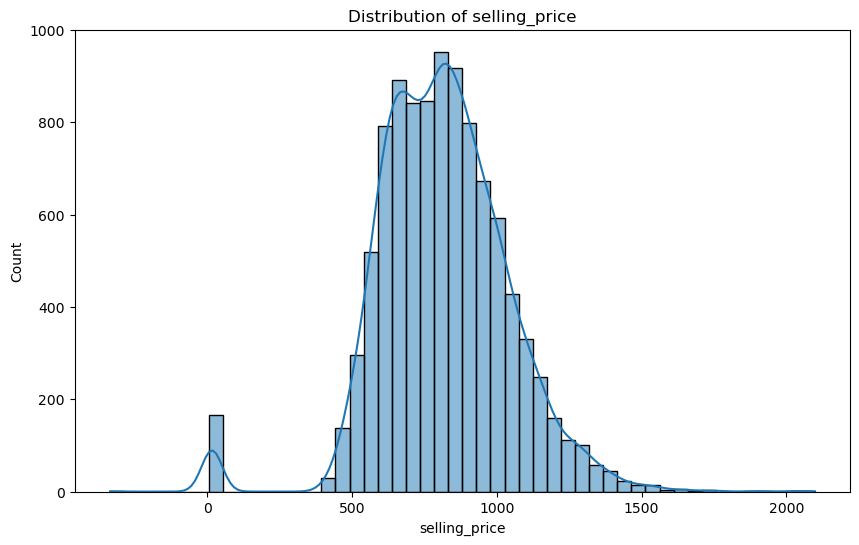

In [15]:

for col in columns:
    if pd.api.types.is_numeric_dtype(df[col]):  
        print(f"Processing column: {col}")
        
        print("Skewness:", df[col].skew())
        
        df_sampled = df.sample(n=10000, random_state=42)
        print(f"Using {len(df_sampled)} random samples from {len(df)} rows.")
        
        plt.figure(figsize=(10, 6))
        sns.histplot(df_sampled[col], kde=True, bins=50)
        plt.title(f"Distribution of {col}")
        plt.show()

In [16]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = df[column].astype(str) 
        df[column] = label_encoder.fit_transform(df[column])
    elif df[column].dtype == 'category':
        df[column] = label_encoder.fit_transform(df[column])
    elif df[column].dtype == 'string':
        df[column] = label_encoder.fit_transform(df[column])

<Axes: ylabel='quantity tons'>

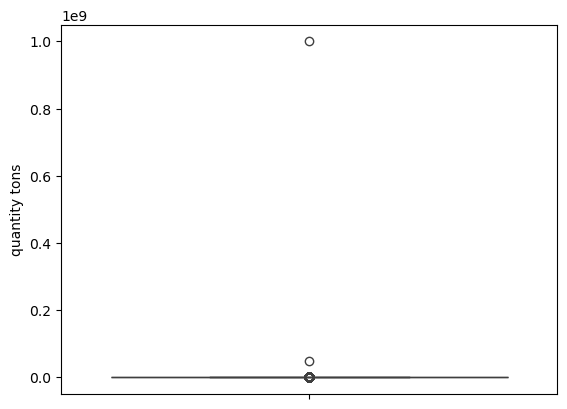

In [17]:
sns.boxplot(y='quantity tons',data=df)

<Axes: ylabel='thickness'>

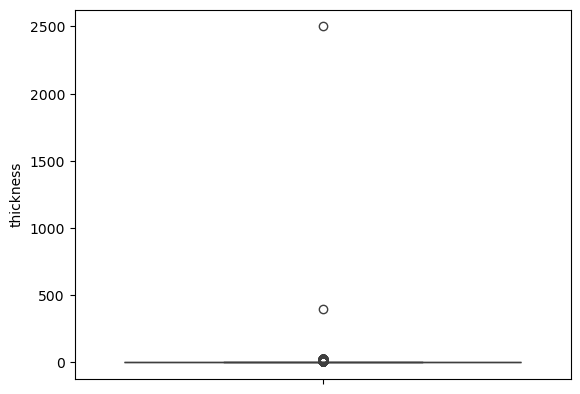

In [18]:
sns.boxplot(y='thickness',data=df)

<Axes: ylabel='width'>

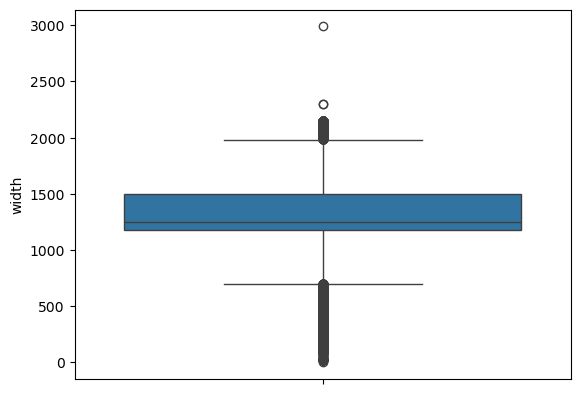

In [19]:
sns.boxplot(y='width',data=df)

<Axes: ylabel='selling_price'>

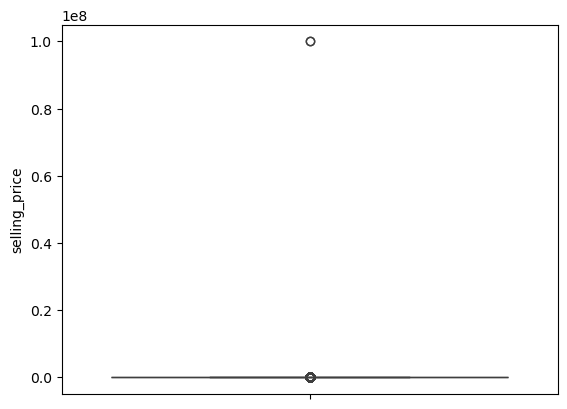

In [20]:
sns.boxplot(y='selling_price',data=df)

In [21]:
def remove_duplicates(col_name):

    Q1 = col_name.quantile(0.25)
    Q3 = col_name.quantile(0.75)
    
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    return lower_bound, upper_bound

In [22]:
min, max = remove_duplicates(df['thickness'])
df['thickness'] = np.where(df['thickness']>max,max,df['thickness'])
df['thickness'] = np.where(df['thickness']<min,min,df['thickness'])

<Axes: ylabel='thickness'>

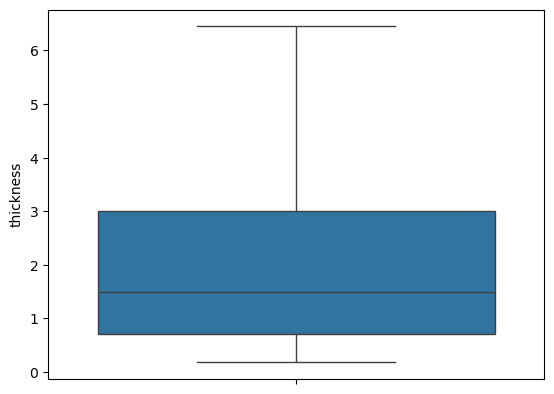

In [23]:
sns.boxplot(y='thickness',data=df)

In [24]:
min, max = remove_duplicates(df['quantity tons'])
df['quantity tons'] = np.where(df['quantity tons']>max,max,df['quantity tons'])
df['quantity tons'] = np.where(df['quantity tons']<min,min,df['quantity tons'])

<Axes: ylabel='quantity tons'>

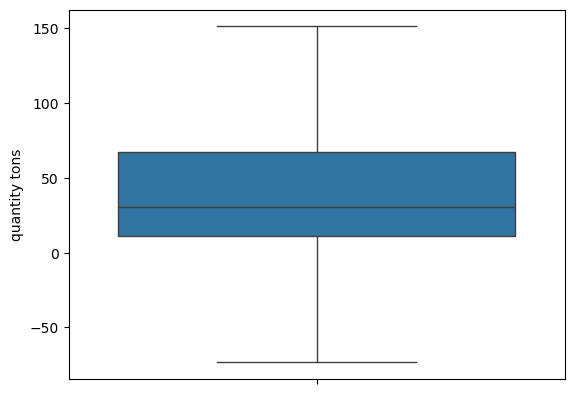

In [25]:
sns.boxplot(y='quantity tons',data=df)

In [26]:
min, max = remove_duplicates(df['width'])
df['width'] = np.where(df['width']>max,max,df['width'])
df['width'] = np.where(df['width']<min,min,df['width'])

<Axes: ylabel='width'>

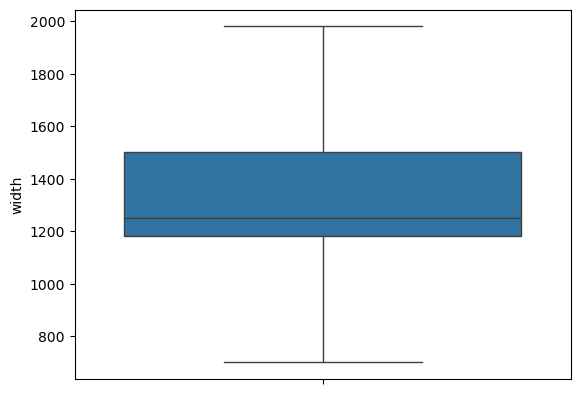

In [27]:
sns.boxplot(y='width',data=df)

In [28]:
min, max = remove_duplicates(df['selling_price'])
df['selling_price'] = np.where(df['selling_price']>max,max,df['selling_price'])
df['selling_price'] = np.where(df['selling_price']<min,min,df['selling_price'])

<Axes: ylabel='selling_price'>

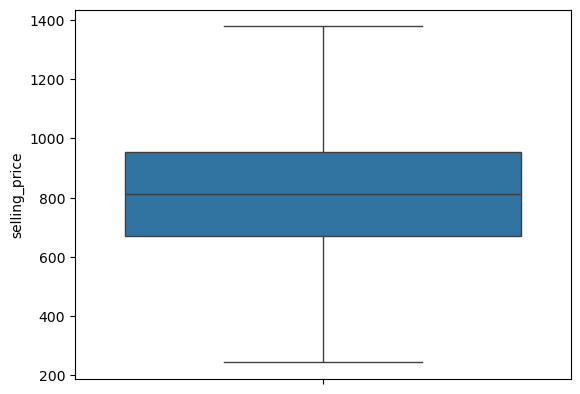

In [29]:
sns.boxplot(y='selling_price',data=df)

Processing column: id
Skewness: -6.297242724492946e-10
Using 10000 random samples from 181673 rows.


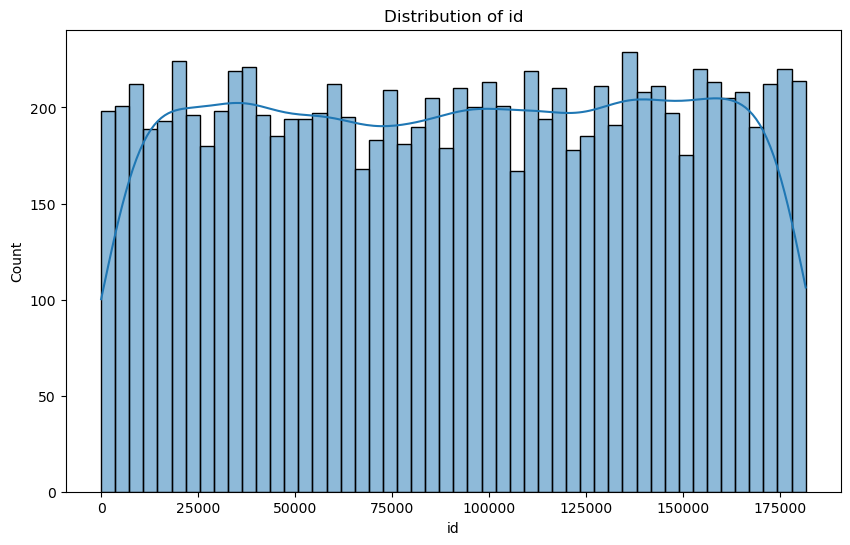

Processing column: item_date
Skewness: -426.23115794132224
Using 10000 random samples from 181673 rows.


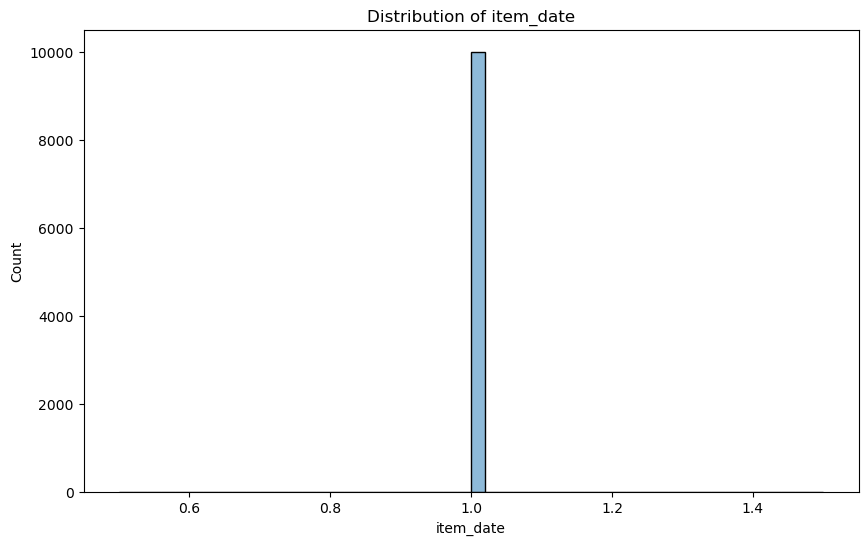

Processing column: quantity tons
Skewness: 1.1216635453741894
Using 10000 random samples from 181673 rows.


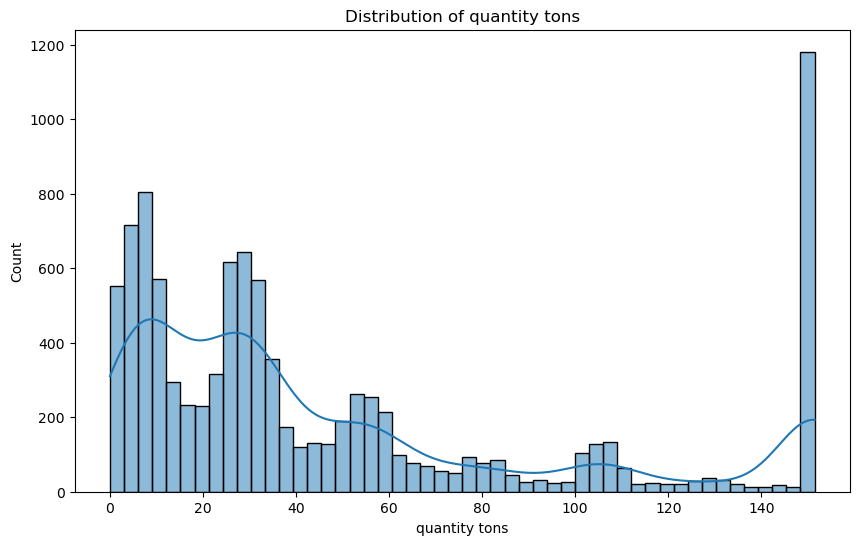

Processing column: customer
Skewness: 86.9853083481409
Using 10000 random samples from 181673 rows.


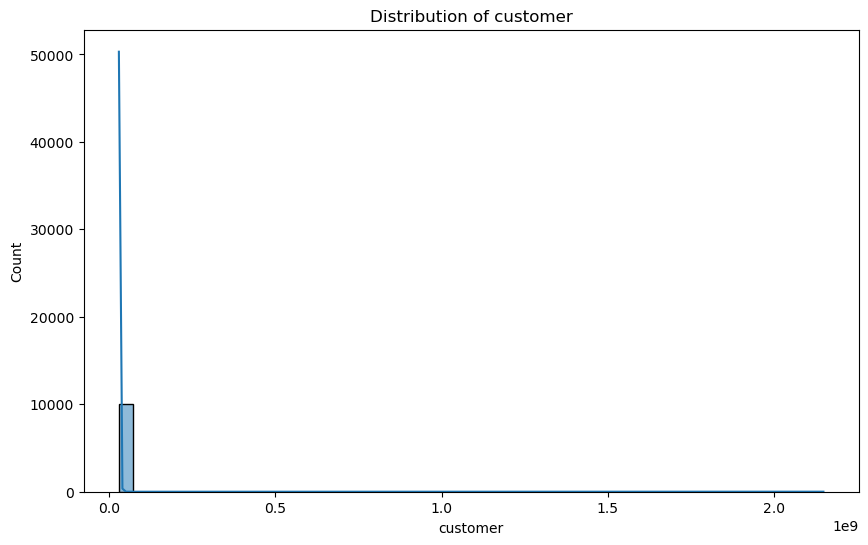

Processing column: country
Skewness: 0.4859850232800058
Using 10000 random samples from 181673 rows.


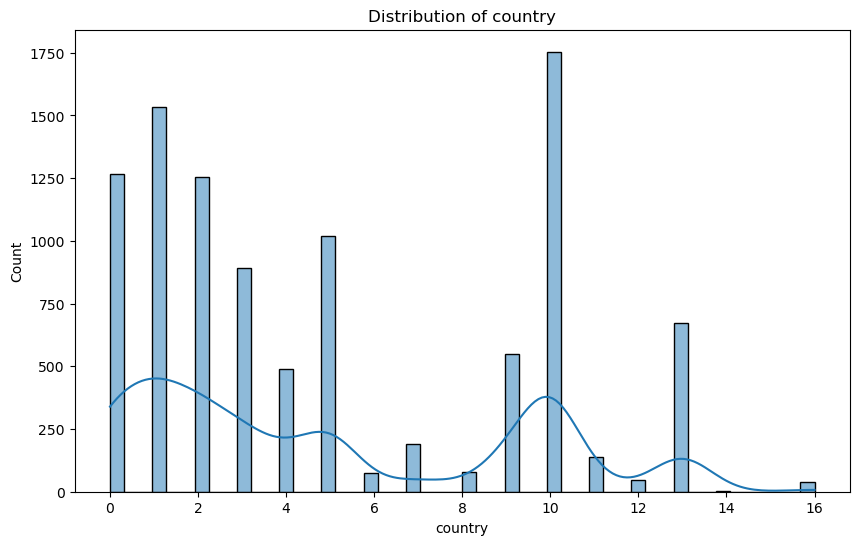

Processing column: status
Skewness: -0.8733865172615715
Using 10000 random samples from 181673 rows.


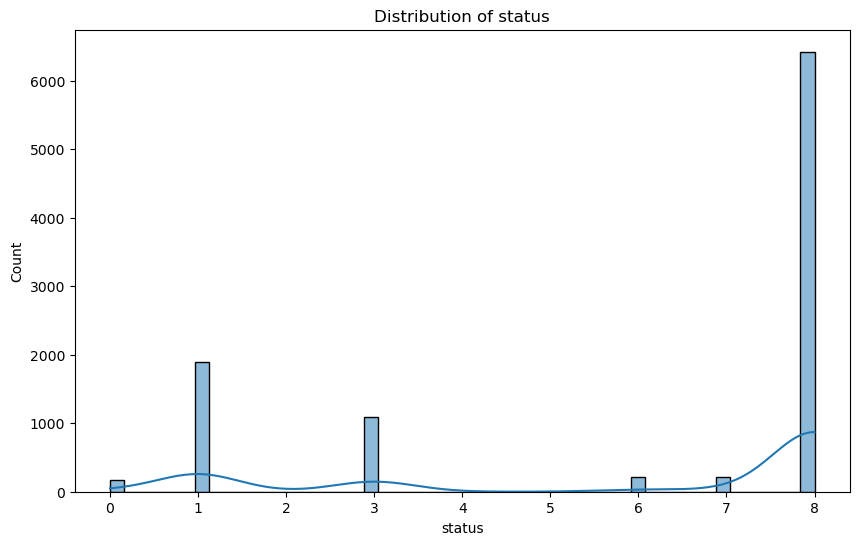

Processing column: item type
Skewness: -0.4875370675112151
Using 10000 random samples from 181673 rows.


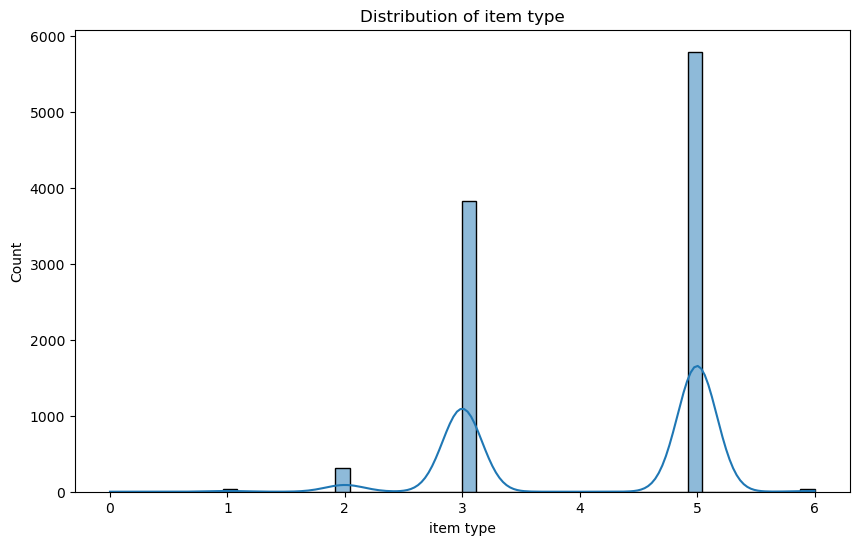

Processing column: application
Skewness: 0.4567045557669605
Using 10000 random samples from 181673 rows.


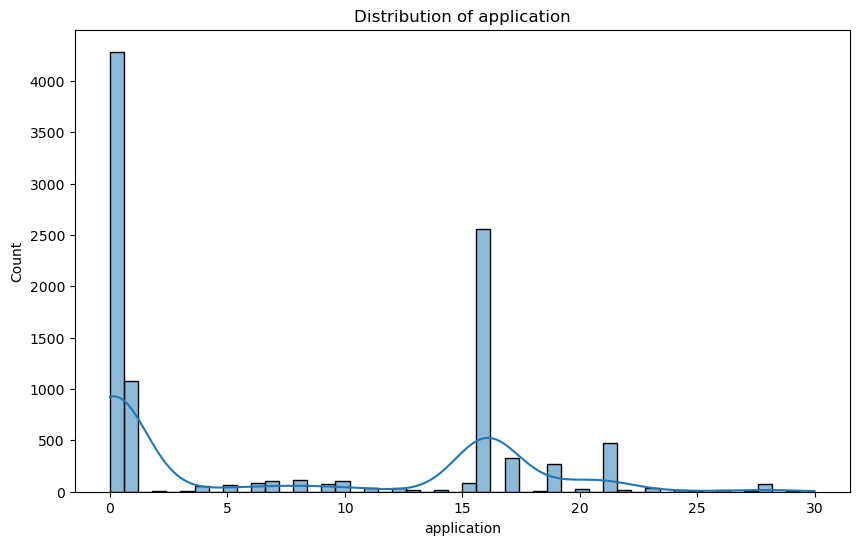

Processing column: thickness
Skewness: 1.0609430924901713
Using 10000 random samples from 181673 rows.


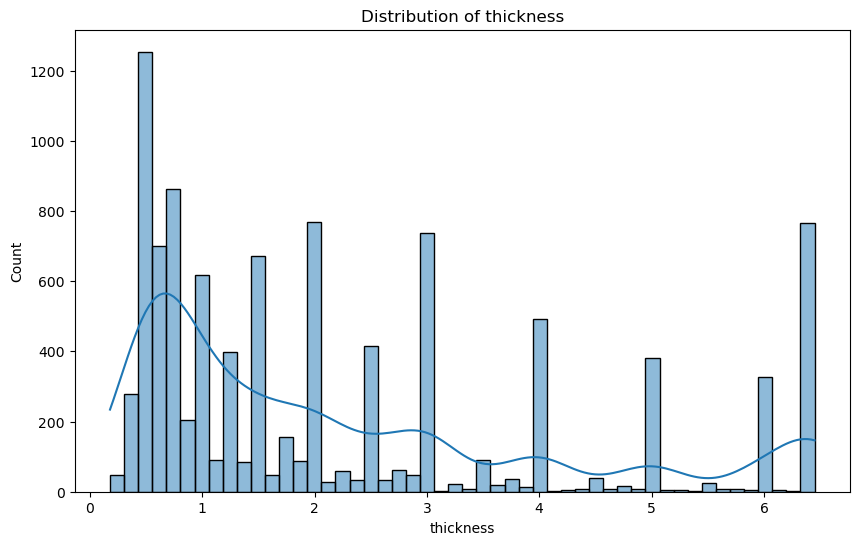

Processing column: width
Skewness: 0.6676586729550522
Using 10000 random samples from 181673 rows.


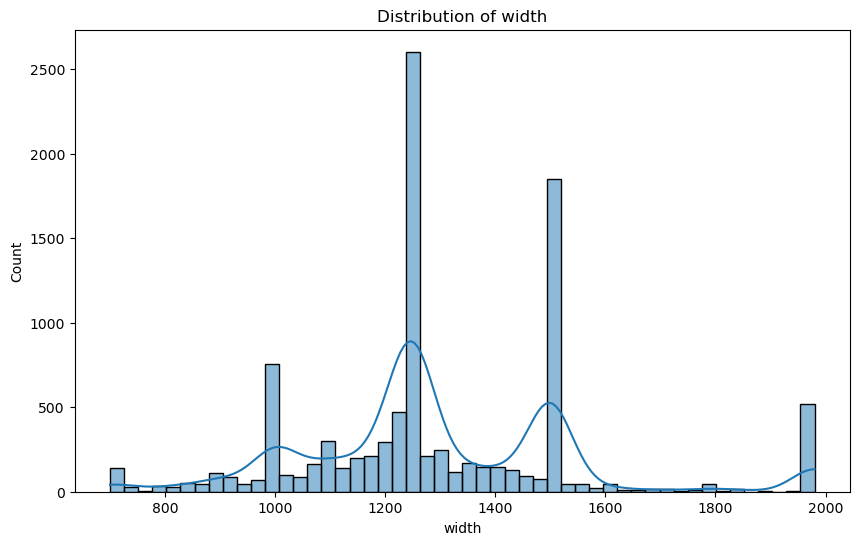

Processing column: material_ref
Skewness: -0.8286927904133494
Using 10000 random samples from 181673 rows.


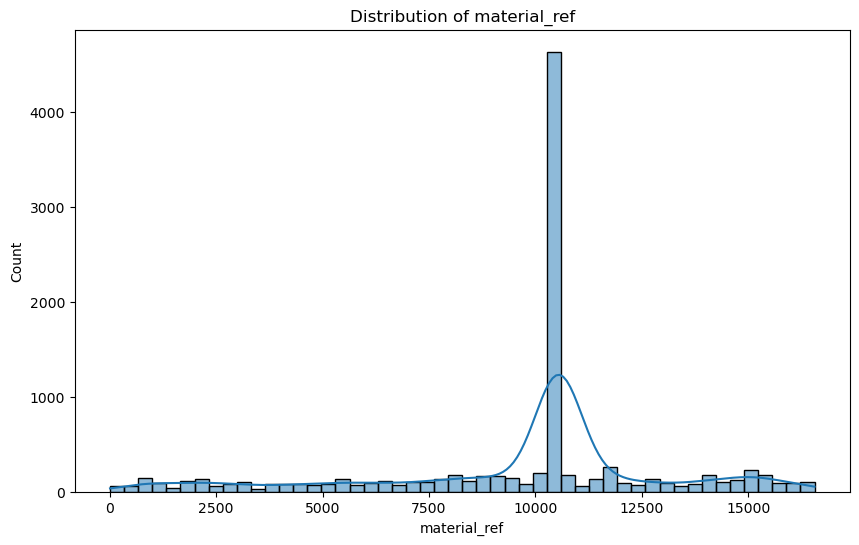

Processing column: product_ref
Skewness: 1.0152155732872308
Using 10000 random samples from 181673 rows.


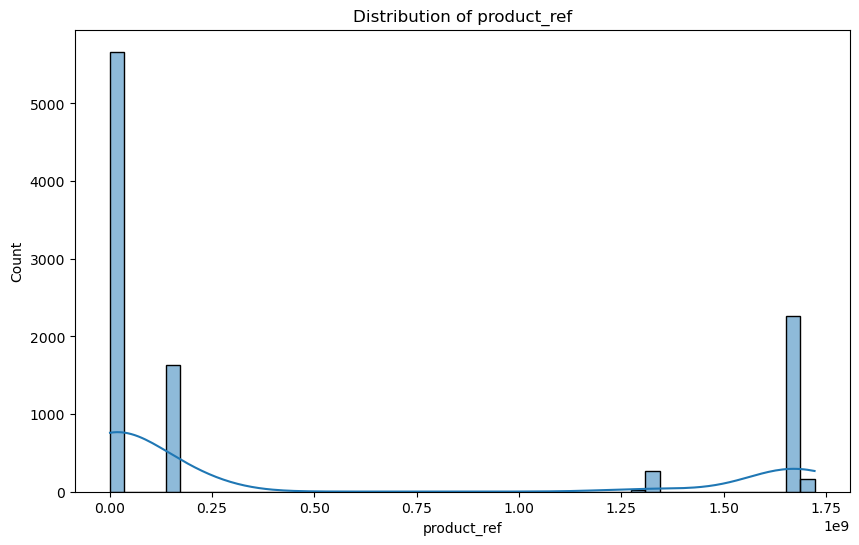

Processing column: delivery date
Skewness: 188.69430089332977
Using 10000 random samples from 181673 rows.


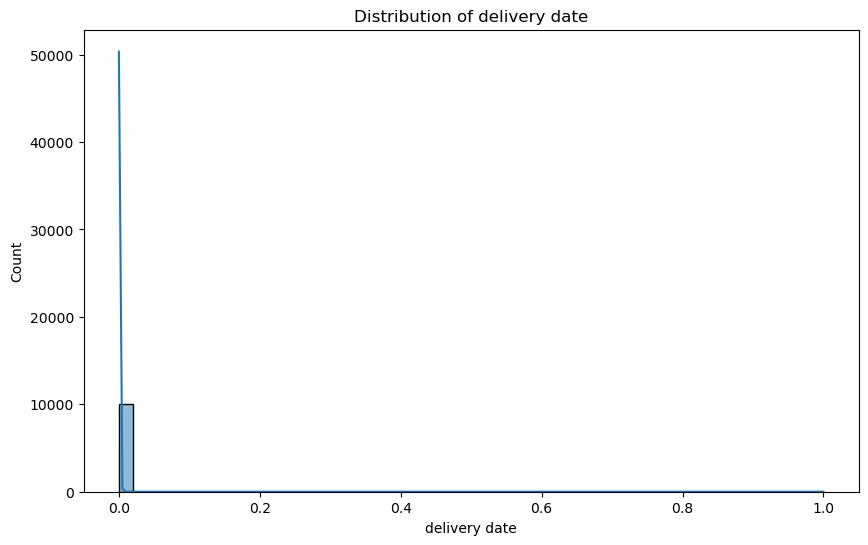

Processing column: selling_price
Skewness: 0.13654879739526
Using 10000 random samples from 181673 rows.


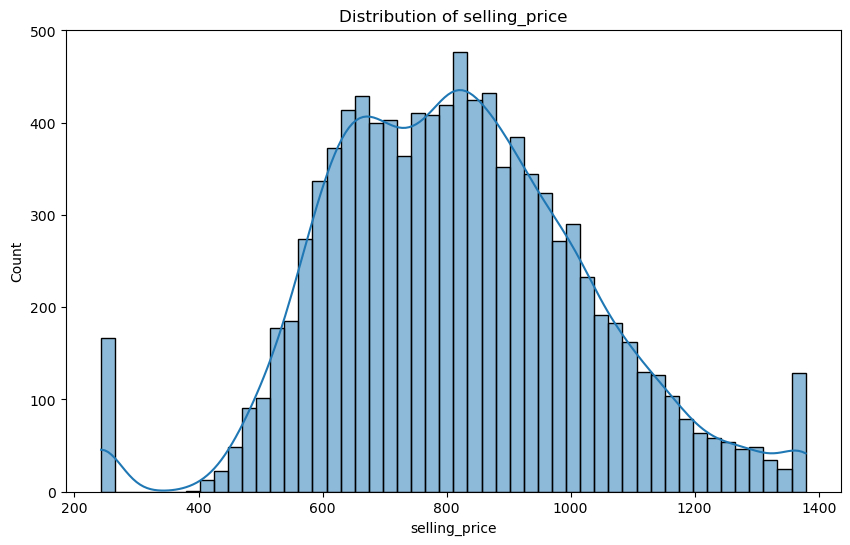

In [30]:

for col in columns:
    if pd.api.types.is_numeric_dtype(df[col]):  
        print(f"Processing column: {col}")
        
        print("Skewness:", df[col].skew())
        
        df_sampled = df.sample(n=10000, random_state=42)
        print(f"Using {len(df_sampled)} random samples from {len(df)} rows.")
        
        plt.figure(figsize=(10, 6))
        sns.histplot(df_sampled[col], kde=True, bins=50)
        plt.title(f"Distribution of {col}")
        plt.show()

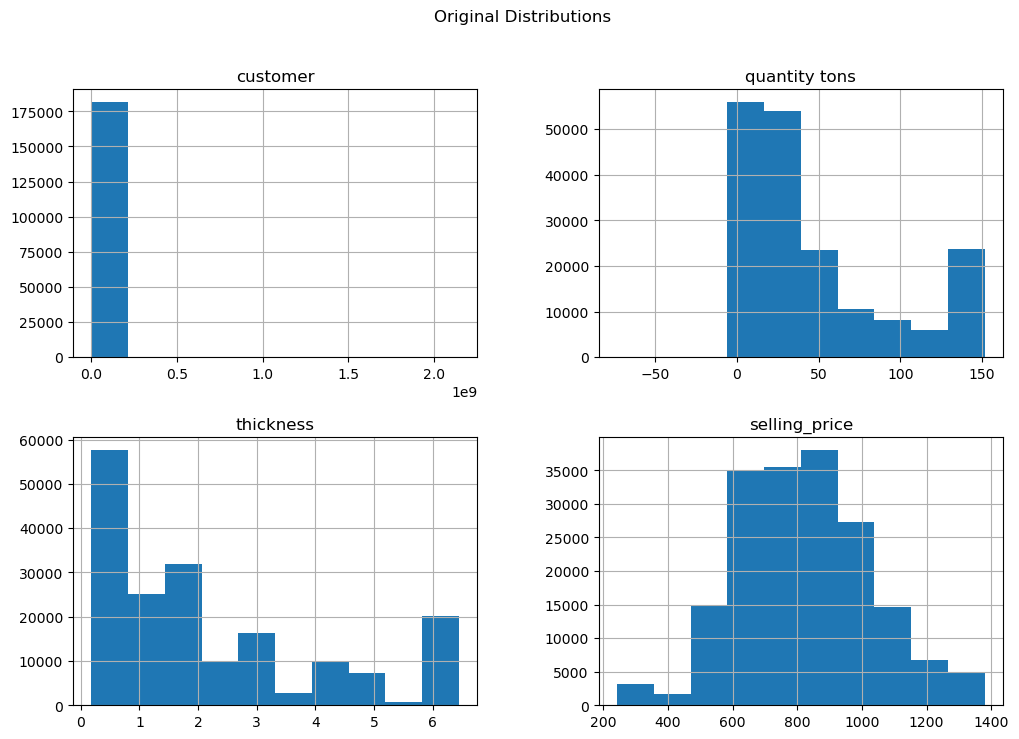

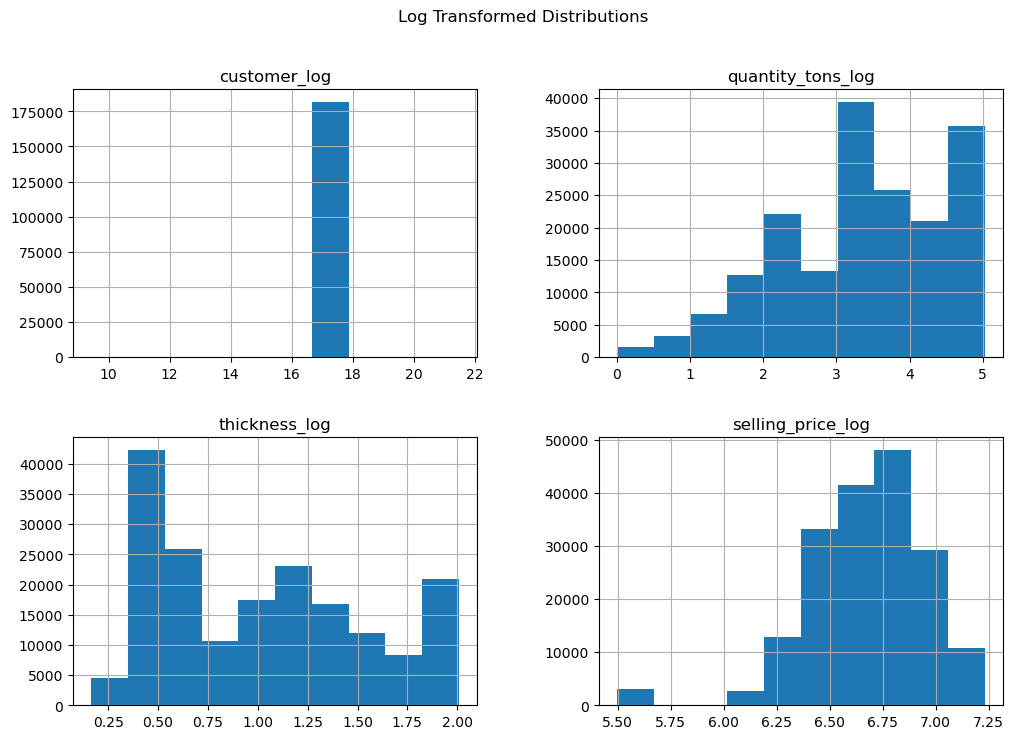

,customer,customer_log,quantity tons,quantity_tons_log,thickness,thickness_log
0,30156308.0,17.221905,54.151139,4.010077,2.00,1.098612
1,30202938.0,17.223450,151.445401,5.026807,0.80,0.587787
2,30153963.0,17.221827,151.445401,5.026807,0.38,0.322083
3,30349574.0,17.228293,151.445401,5.026807,2.30,1.193922
4,30211560.0,17.223735,151.445401,5.026807,4.00,1.609438


In [31]:
df[['customer', 'quantity tons', 'thickness', 'selling_price']].hist(figsize=(12, 8))
plt.suptitle("Original Distributions")
plt.show()

df['customer_log'] = np.log1p(df['customer'])
df['quantity_tons_log'] = np.log1p(df['quantity tons'])
df['thickness_log'] = np.log1p(df['thickness'])
df['selling_price_log'] = np.log1p(df['selling_price'])

df[['customer_log', 'quantity_tons_log', 'thickness_log', 'selling_price_log']].hist(figsize=(12, 8))
plt.suptitle("Log Transformed Distributions")
plt.show()

df[['customer', 'customer_log', 'quantity tons', 'quantity_tons_log', 'thickness', 'thickness_log']].head()

In [32]:
df.drop('customer', axis=1, inplace=True)
df.drop('quantity tons', axis=1, inplace=True)
df.drop('thickness', axis=1, inplace=True)
df.drop('selling_price', axis=1, inplace=True)

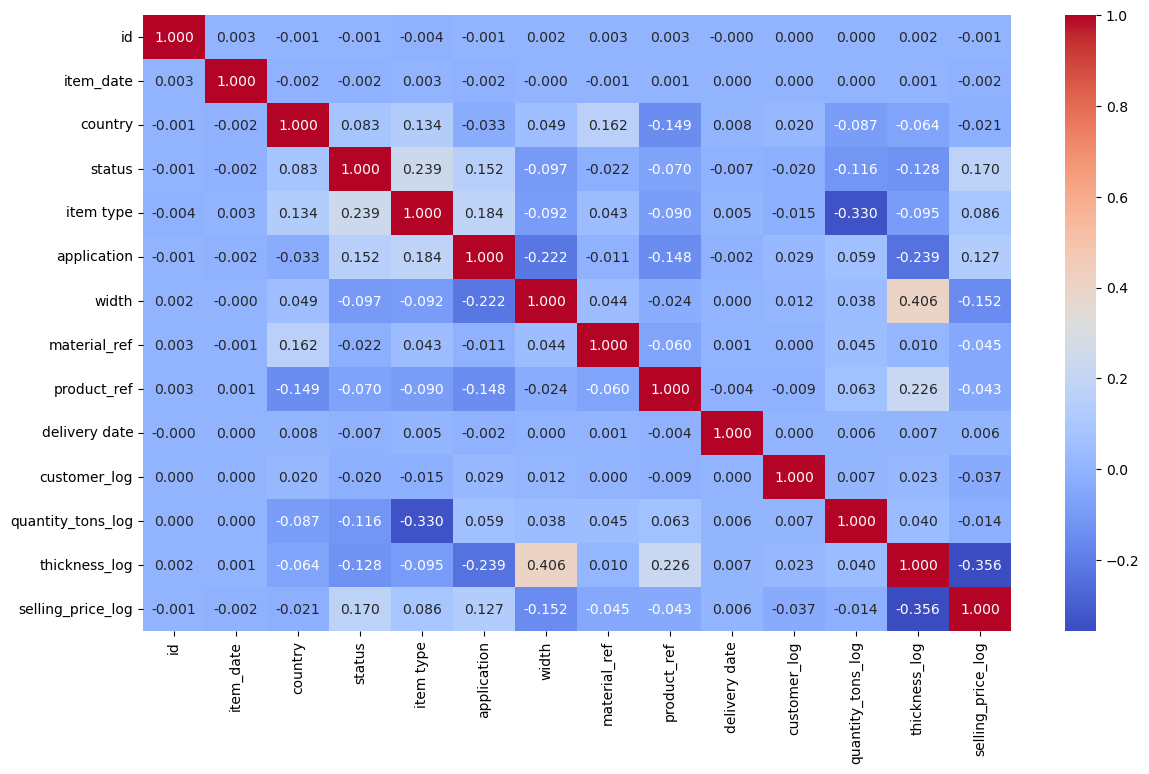

In [33]:
numeric_columns = df.select_dtypes(include=['number']).columns
df_heatmap = df[numeric_columns].corr()
plt.figure(figsize=(14, 8))
sns.heatmap(df_heatmap, annot=True, fmt='.3f', cmap='coolwarm')
plt.show()